# Reinforcement Learning: Multi-Armed Bandit

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use('seaborn')

In [2]:
#Set hyperparameters
n_experiments = 1000 # Set the number of experiments to n_experiments
steps = 10000 # Set the number of steps to steps
k = 10 # Set the number of arms of the Multi-Armed bandit to k
optimist = 0 # Set optimistic action values estimates at start up to optimistic
epsilon = 0.1 # Set the proportion of exploration versus exploitation  to epsilon
alpha = 0.1 # Set constant step-size parameter alpha for nonstationary Problem

In [3]:
def average_rewards(n_experiments=n_experiments,
                    steps=steps,
                    k=k,
                    epsilon=epsilon,
                    alpha=alpha):

    # Record start time
    t0 = time.clock()
    
    averages = np.zeros([steps]) # Initialize averages
    
    experiments_j = 0 # Initialize experiment count
    
    for j in range(n_experiments):
        experiments_j += 1 # Update experiment index
        q_star = np.random.normal(0, 1, k) # Set actual action values
        # q_star = q_star*0 # Action values
        step = np.zeros([k]) # Initialize step counter
        Q = np.zeros([k]) + optimist # Initialize action values estimates
        avg=[] # Initialize average
        avg.append(0)
        o=0
    
        for j in range(steps):
            exploration = np.random.uniform() < epsilon # Draw between exploration and exploitation
            index = (not exploration)*np.random.choice(np.where(Q == Q.max())[0]) + exploration*np.random.randint(0,k)
            step[index]+=1
            r=np.random.normal(q_star[index], 1)
            o = o + alpha*(1-o)
            beta = alpha/o
            # Q[index]= Q[index] + (r-Q[index])/step[index]# Compute reward of action
            Q[index]= Q[index] + (r-Q[index])*alpha # Compute reward of action
            # Q[index]= Q[index] + (r-Q[index])*beta # Compute reward of action
            r=avg[-1]+(r-avg[-1])/np.sum(step)
            avg.append(r)
            # q_star=q_star+np.random.normal(0, 0.01, k)
        avg.pop(0)
    
        averages = averages + (avg-averages)/experiments_j
    
    print(time.clock()-t0)
    
    return averages

In [4]:
# Compute results
averages=average_rewards(epsilon=0)
averages_epsilon=average_rewards(epsilon=0.1)
averages_alpha=average_rewards(alpha = 0.1)

329.3726646
327.3422512
325.31113029999995


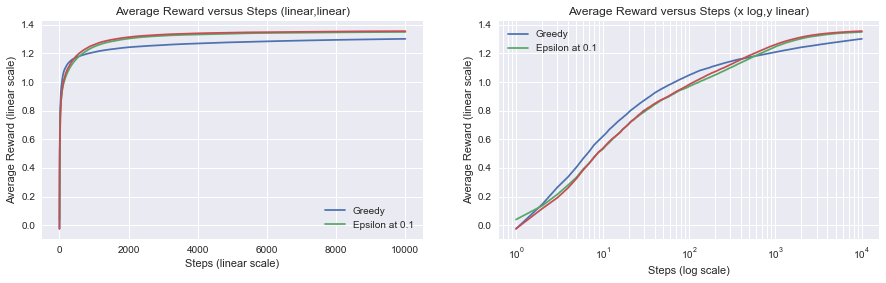

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,4));
ax1.set_title("Average Reward versus Steps (linear,linear)");  
ax1.set_xlabel("Steps (linear scale)");
ax1.set_ylabel("Average Reward (linear scale)");
ax1.grid(visible=True, which='both');
ax1.plot(range(1,steps+1),averages, label='Greedy');

ax2.set_xscale('log');
ax2.set_title("Average Reward versus Steps (x log,y linear)");
ax2.set_xlabel("Steps (log scale)");
ax2.set_ylabel("Average Reward (linear scale)");
ax2.grid(visible=True, which='both');
ax2.plot(range(1,steps+1),averages, label='Greedy');

ax1.plot(range(1,steps+1),averages_epsilon, label='Epsilon at 0.1');
ax2.plot(range(1,steps+1),averages_epsilon, label='Epsilon at 0.1');

ax1.plot(range(1,steps+1),averages_alpha);
ax2.plot(range(1,steps+1),averages_alpha);

ax1.legend();
ax2.legend();